In [1]:
#First Load a file of structure y = ax1+bx2+cx3 +d
import numpy as np
import pandas as pd

#Read the csv into a dataframe
df = pd.read_csv("./data.csv")
df.head()

,x1,x2,x3,z,y
0,1,2,3,0,4
1,5,6,7,0,8
2,9,10,11,0,12
3,13,14,15,0,16
4,17,18,19,0,20


/home/gaurav/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/gaurav/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/gaurav/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='x1', ylabel='x1'>,
        <AxesSubplot:xlabel='x2', ylabel='x1'>,
        <AxesSubplot:xlabel='x3', ylabel='x1'>,
        <AxesSubplot:xlabel='z', ylabel='x1'>,
        <AxesSubplot:xlabel='y', ylabel='x1'>],
       [<AxesSubplot:xlabel='x1', ylabel='x2'>,
        <AxesSubplot:xlabel='x2', ylabel='x2'>,
        <AxesSubplot:xlabel='x3', ylabel='x2'>,
        <AxesSubplot:xlabel='z', ylabel='x2'>,
        <AxesSubplot:xlabel='y', ylabel='x2'>],
       [<AxesSubplot:xlabel='x1', ylabel='x3'>,
        <AxesSubplot:xlabel='x2', ylabel='x3'>,
        <AxesSubplot:xlabel='x3', ylabel='x3'>,
        <AxesSubplot:xlabel='z', ylabel='x3'>,
        <AxesSubplot:xlabel='y', ylabel='x3'>],
       [<AxesSubplot:xlabel='x1', ylabel='z'>,
        <AxesSubplot:xlabel='x2', ylabel='z'>,
        <AxesSubplot:xlabel='x3', ylabel='z'>,
        <AxesSubplot:xlabel='z', ylabel='z'>,
        <AxesSubplot:xlabel='y', ylabel='z'>],
       [<AxesSubplot:xlabel='x1', ylabel='y'>,
  

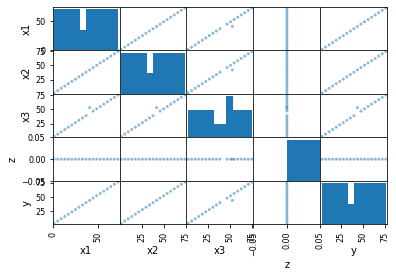

In [2]:
#Now lets plot the relationship
import matplotlib as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df)


In [3]:
#Now lets split data into train and test
#To do this lets first get X and y data set

X = df[['x1','x2','x3']]
X.head()

,x1,x2,x3
0,1,2,3
1,5,6,7
2,9,10,11
3,13,14,15
4,17,18,19


In [4]:
y = df['y']
y.head()

0     4
1     8
2    12
3    16
4    20
Name: y, dtype: int64

In [5]:
#Next lets split it train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [6]:
X_train.head()


,x1,x2,x3
13,53,54,55
15,61,62,63
17,69,70,71
2,9,10,11
9,37,38,39


In [7]:
y_train.head()


13    56
15    64
17    72
2     12
9     40
Name: y, dtype: int64

In [8]:
X_test.head()


,x1,x2,x3
0,1,2,3
5,21,22,23
11,45,46,47
1,5,6,7
8,33,34,35


In [9]:
y_test.head()

0      4
5     24
11    48
1      8
8     36
Name: y, dtype: int64

In [10]:
#Train the model
from sklearn.linear_model import LinearRegression
# we will call our model reg
reg = LinearRegression().fit(X_train, y_train)

TypeError: fit() got an unexpected keyword argument 'normalize'

In [ ]:
#Check the prediction
reg.predict(X_test)


array([ 4., 24., 48.,  8., 36., 68., 16.])

In [ ]:
#Let us check the model accuracy
reg.score(X_test, y_test)

#At this stage I could try different models like
#linear_model.Lasso
#linear_model.BayesianRidge
# and others, check the score for each
#also I could tune hyper parematers and optimize them to select the best model
#Note dataiku does this for us

1.0

In [ ]:
#Now lets predict some random value
reg.predict([[1,2,3]])
#This should be 4

/home/gaurav/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.])

In [ ]:
#Predicting some random set of values
reg.predict([[7,9, 12]])


/home/gaurav/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.5])

In [ ]:
# Now we have a trained model, let us pickle it for future use
import pickle
pickle.dump(reg,open('./model.pkl','wb'))


In [ ]:
#now let us assume we are on a seperate enviornment 

from sklearn.linear_model import LinearRegression
import pickle
loaded_model = pickle.load(open('./model.pkl', 'rb'))
loaded_model.predict([[1,2,3],[7,9,12]])

/home/gaurav/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4. , 10.5])